In [30]:
%matplotlib inline
import numpy as np
from random import randint
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf
from tensorflow.keras import models, layers

In [31]:
train_labels = []
train_samples = []

Story:
For the people who have watched "Rise of the Planet of Apes", this story will be familiar.

A pharmaceutical chemist William Rodman is testing a viral based drug named ALZ-112 at Gen-Sys labs. A female chimp marked as Test Subject-09 is introduced to the drug and shows signs of remarkable intelligence. This also causes the chimps irises turn flexi green and hence the name, Bright Eyes. This drug was originally developed to treat Alzhimers, but its being tested on the chimps first. Later William introduces this drug to his father who also is suffering from alzheimers but unlike Bright Eyes he suffers some side effects.

Our objective here is predict if a perso of certain age is intruduced to the drug will he/she show the signs of side effects or not.

The drug will be tested on individuals from ages 30 to 100 in a clinical trial.
The trial had 2100 participants. Half were under 65 years old, half were 65 years or older.
Around 95% of the patients of age 65 or older experinced side effects.
Around 95% of patients of age under 65 experienced no side effects.

In [32]:
for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(30, 64)
    train_samples.append(random_younger)
    train_labels.append(1)

    #The ~5% of older individuals who did not experience side effects
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(30, 64)
    train_samples.append(random_younger)
    train_labels.append(0)

    #The ~95% of older individuals who did experience side effects
    random_older = randint(65, 100)
    train_samples.append(random_older)
    train_labels.append(1)

In [33]:
# for i in train_samples:
#     print(i)

In [34]:
# for i in train_labels:
#     print(i)

In [35]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [36]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_samples = scaler.fit_transform(train_samples.reshape(-1, 1))

In [37]:
# for i in train_samples:
#     print(i)

In [38]:
model = models.Sequential([])

model.add(layers.Dense(16, input_shape=(1,), activation="relu"))
model.add(layers.Dense(32, activation="relu"))
model.add(layers.Dense(2, activation="softmax"))


In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 16)                32        
_________________________________________________________________
dense_4 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [40]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), metrics=['accuracy'])

In [41]:
history = model.fit(train_samples, train_labels, batch_size=10, epochs=10, validation_split=0.1, verbose=2)

Epoch 1/10
189/189 - 2s - loss: 0.5161 - accuracy: 0.7561 - val_loss: 0.4519 - val_accuracy: 0.8571
Epoch 2/10
189/189 - 1s - loss: 0.3132 - accuracy: 0.9344 - val_loss: 0.3441 - val_accuracy: 0.9381
Epoch 3/10
189/189 - 1s - loss: 0.2642 - accuracy: 0.9466 - val_loss: 0.3343 - val_accuracy: 0.9190
Epoch 4/10
189/189 - 1s - loss: 0.2547 - accuracy: 0.9497 - val_loss: 0.3320 - val_accuracy: 0.9381
Epoch 5/10
189/189 - 1s - loss: 0.2512 - accuracy: 0.9460 - val_loss: 0.3271 - val_accuracy: 0.9190
Epoch 6/10
189/189 - 0s - loss: 0.2480 - accuracy: 0.9460 - val_loss: 0.3270 - val_accuracy: 0.9381
Epoch 7/10
189/189 - 0s - loss: 0.2464 - accuracy: 0.9466 - val_loss: 0.3289 - val_accuracy: 0.9381
Epoch 8/10
189/189 - 0s - loss: 0.2450 - accuracy: 0.9466 - val_loss: 0.3341 - val_accuracy: 0.9286
Epoch 9/10
189/189 - 0s - loss: 0.2450 - accuracy: 0.9503 - val_loss: 0.3212 - val_accuracy: 0.9190
Epoch 10/10
189/189 - 0s - loss: 0.2444 - accuracy: 0.9450 - val_loss: 0.3215 - val_accuracy: 0.9000

In [42]:
accuracy = history.history['accuracy']
loss = history.history['loss']

val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

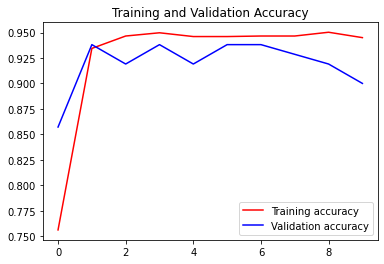

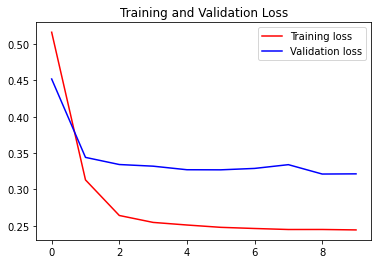

In [43]:
epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label="Training accuracy")
plt.plot(epochs, val_accuracy, 'b', label="Validation accuracy")
plt.legend()
plt.title("Training and Validation Accuracy")
plt.show()

plt.plot(epochs, loss, 'r', label="Training loss")
plt.plot(epochs, val_loss, 'b', label="Validation loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()

In [44]:
test_labels = []
test_samples = []

In [45]:
for i in range(10):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(30, 64)
    test_samples.append(random_younger)
    test_labels.append(1)

    #The ~5% of older individuals who did not experience side effects
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(30, 64)
    test_samples.append(random_younger)
    test_labels.append(0)

    #The ~9% of older individuals who did experience side effects
    random_older = randint(65, 100)
    test_samples.append(random_older)
    test_labels.append(1)

In [46]:
test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

In [47]:
scaler = MinMaxScaler(feature_range=(0, 1))
test_samples = scaler.fit_transform(test_samples.reshape(-1, 1))

In [48]:
predictions = model.predict(test_samples, batch_size=10, verbose=0)

In [51]:
# for i in predictions:
#     print(i)

In [52]:
roundof_predictions = np.argmax(predictions, axis=1)

# for i in roundof_predictions:
#     print(i)

Confusion Matrix

In [53]:
cm = confusion_matrix(y_true=test_labels, y_pred=roundof_predictions)

In [54]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[201   9]
 [ 23 187]]


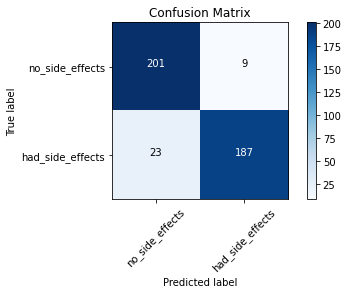

In [55]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

In [56]:
model.save("project-bright-eyes.h5")

In [57]:
model.get_weights()

[array([[-0.5500558 ,  0.7660689 ,  0.7524453 , -0.04552436, -0.5296859 ,
         -0.49640617, -0.33143672, -0.06374544, -0.15889831, -0.1329628 ,
         -0.2867802 ,  0.7297328 , -0.12210467, -0.18838069,  0.40896642,
         -0.2410666 ]], dtype=float32),
 array([ 0.        , -0.18589114, -0.13116129,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.23773581,  0.        ,
         0.        , -0.16523923,  0.        ,  0.        , -0.1558542 ,
         0.        ], dtype=float32),
 array([[-0.18961656, -0.10857652, -0.33057627,  0.3028622 , -0.0813536 ,
          0.14225665,  0.21731481,  0.08659971, -0.03099698, -0.3062019 ,
          0.0082446 ,  0.04570487, -0.14981484, -0.3275186 , -0.07155412,
         -0.03548774,  0.11264715, -0.3184482 ,  0.0411832 , -0.15777217,
         -0.3058    , -0.29929927,  0.23472205, -0.29279846,  0.24976459,
          0.24023762, -0.34123757,  0.07421622, -0.3219906 , -0.08654821,
          0.05334669,  0.08024812],
 